# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [72]:
df = pd.read_csv('previsao_de_renda.csv')

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [74]:
df.drop(columns=['Unnamed: 0', 'index', 'mau'], inplace=True)

print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB
None 



In [76]:
print('Quantidade de linhas duplicadas:', df.duplicated().sum())

Quantidade de linhas duplicadas: 453


In [78]:
print('Quantidade total de linhas:', len(df), '\n')

print('Quantidade após remoção das linhas duplicadas:', 
      len(df.drop_duplicates()), '\n')

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

Quantidade total de linhas: 15000 

Quantidade após remoção das linhas duplicadas: 14547 



In [80]:
# Selecionando apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calculando a correlação
correlation_matrix = df_numeric.corr()
correlation_matrix


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.368619,-0.074090,0.895710,0.009206
idade,-0.368619,1.000000,0.322335,-0.342854,0.042837
tempo_emprego,-0.074090,0.322335,1.000000,-0.064750,0.394918
qt_pessoas_residencia,0.895710,-0.342854,-0.064750,1.000000,0.020118
renda,0.009206,0.042837,0.394918,0.020118,1.000000


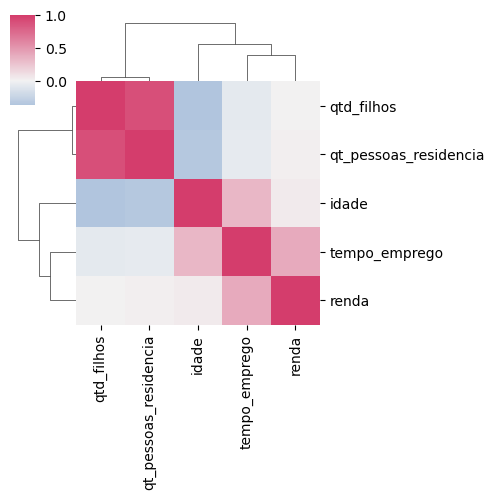

In [82]:
cmap = sns.diverging_palette(h_neg=250, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

sns.clustermap(data=correlation_matrix, 
               figsize=(5, 5), 
               center=0, 
               cmap=cmap)

plt.show()

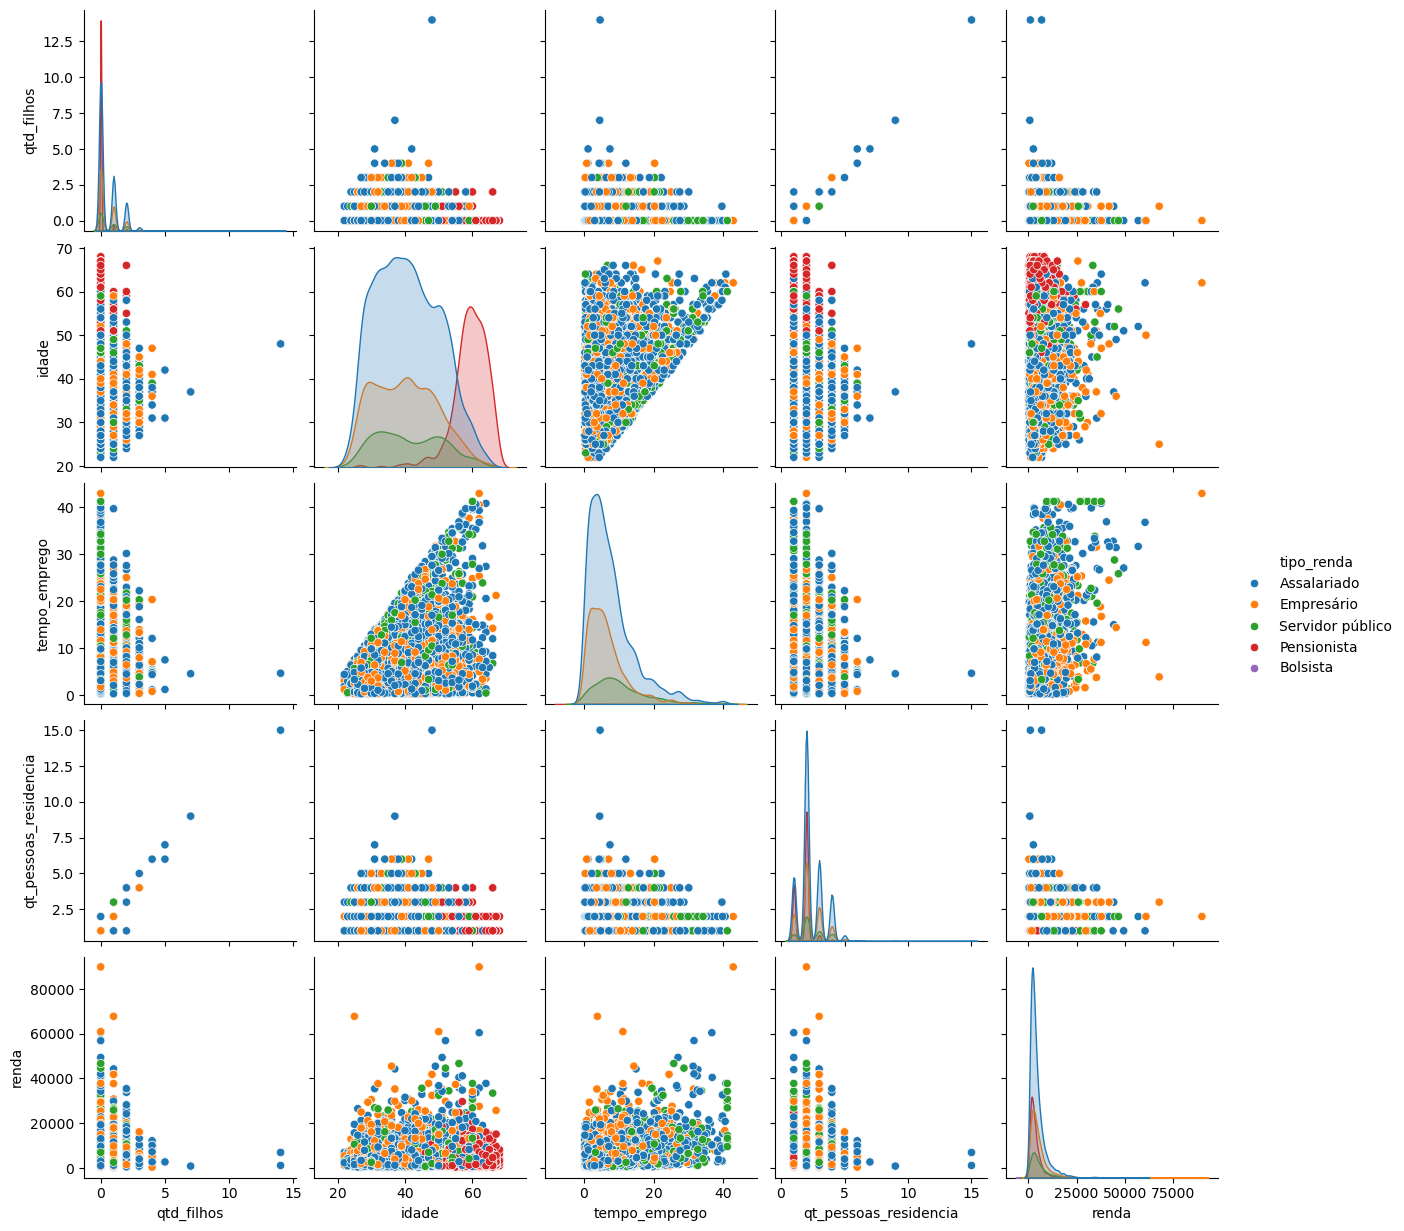

In [84]:
sns.pairplot(data=df, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'])

plt.show()

Observando a matriz de dispersão e correlação, pode-se observar uma correlação alta entre o número de moradores na casa e a quantidade de filhos, como uma margem de 89% de correlação, porém, além desse indicador, podemos observar na matriz de correlação que o tempo de serviço e a renda tem cerca de 39% de correlação, que dentre as demais, é a maior, ao observar o gráfico de disperção, vemos que os dados estão concentrados no aumento do tempo de emprego com um movimento menor da eixo da renda, com algumas exceções, como na bolinha empresário que aparentemente acompanhou o aumento dos 2 eixos ao mesmo tempo.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

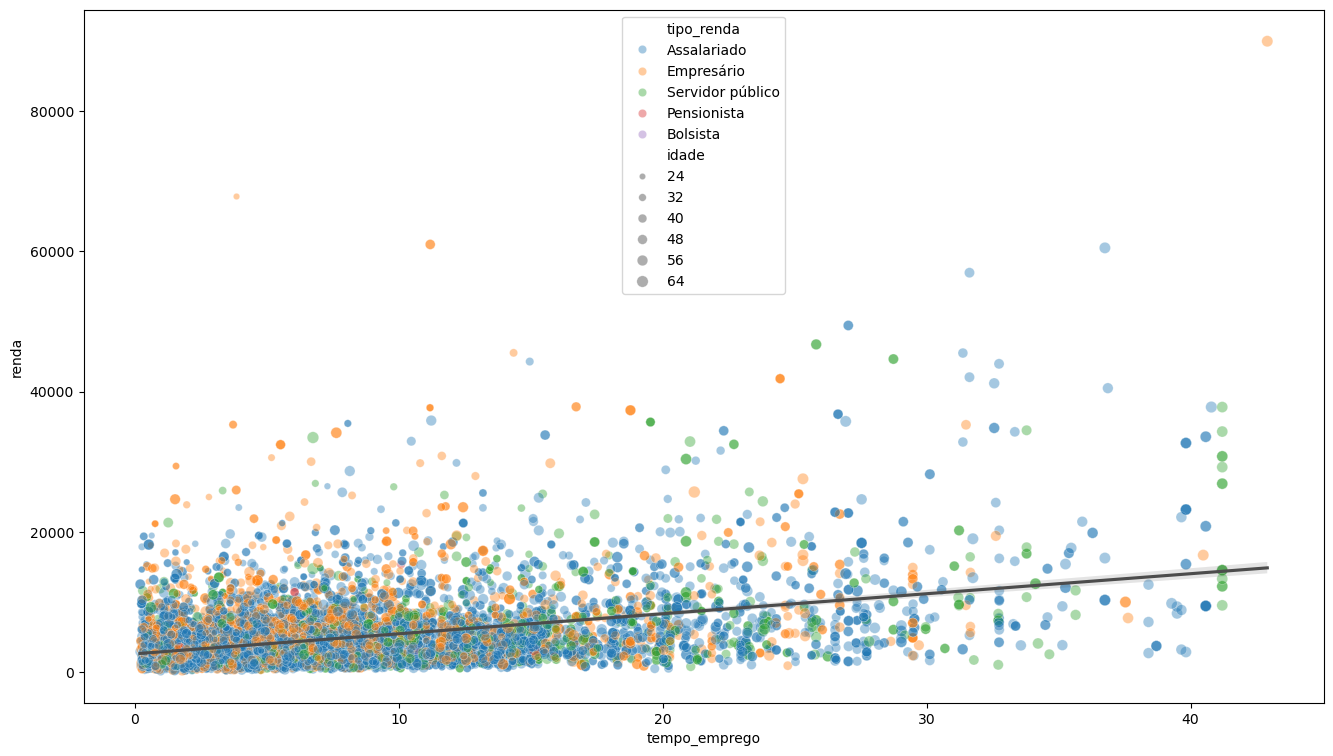

In [88]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.3')

plt.show()

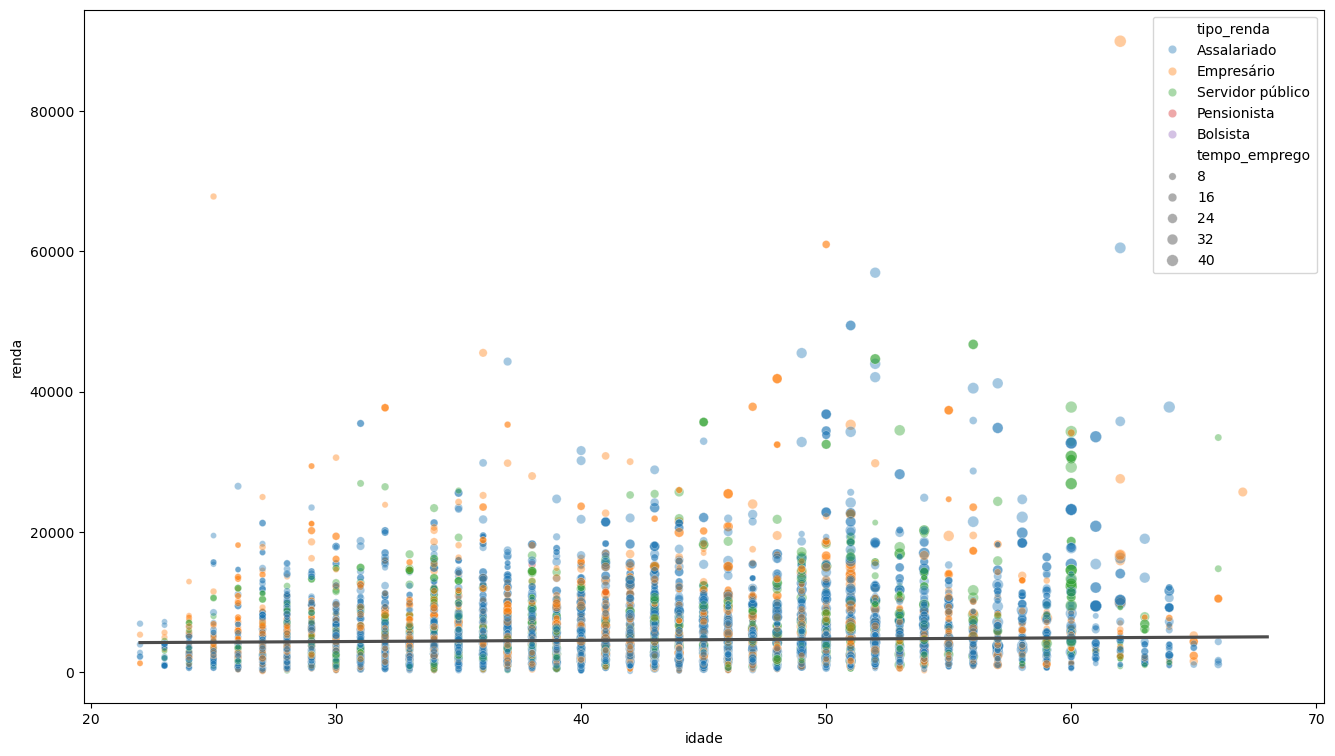

In [53]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', y='renda', data=df, scatter=False, color='.3')

plt.show()

Apesar de serem as 2 principais correlações com a variável renda, podemos ver nos gráficos uma grande dispersão.

3) Na sua opinião, há outliers na variável renda?

Sim, porém, concentrados em tempo de serviço quando trata-se de empresarios, o que causado pela baixa incidencia, pode gerar informações que talvez
não sejam tão significativas para a análise das tendências. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

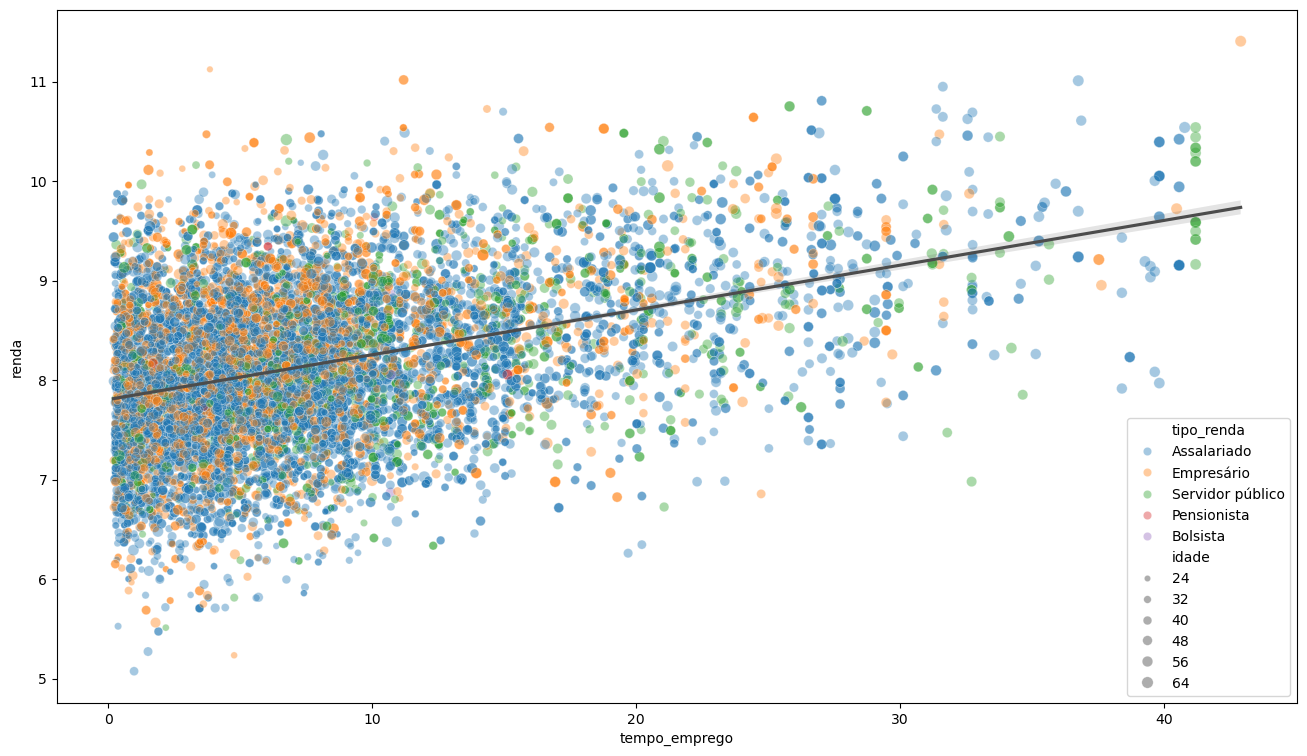

In [94]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

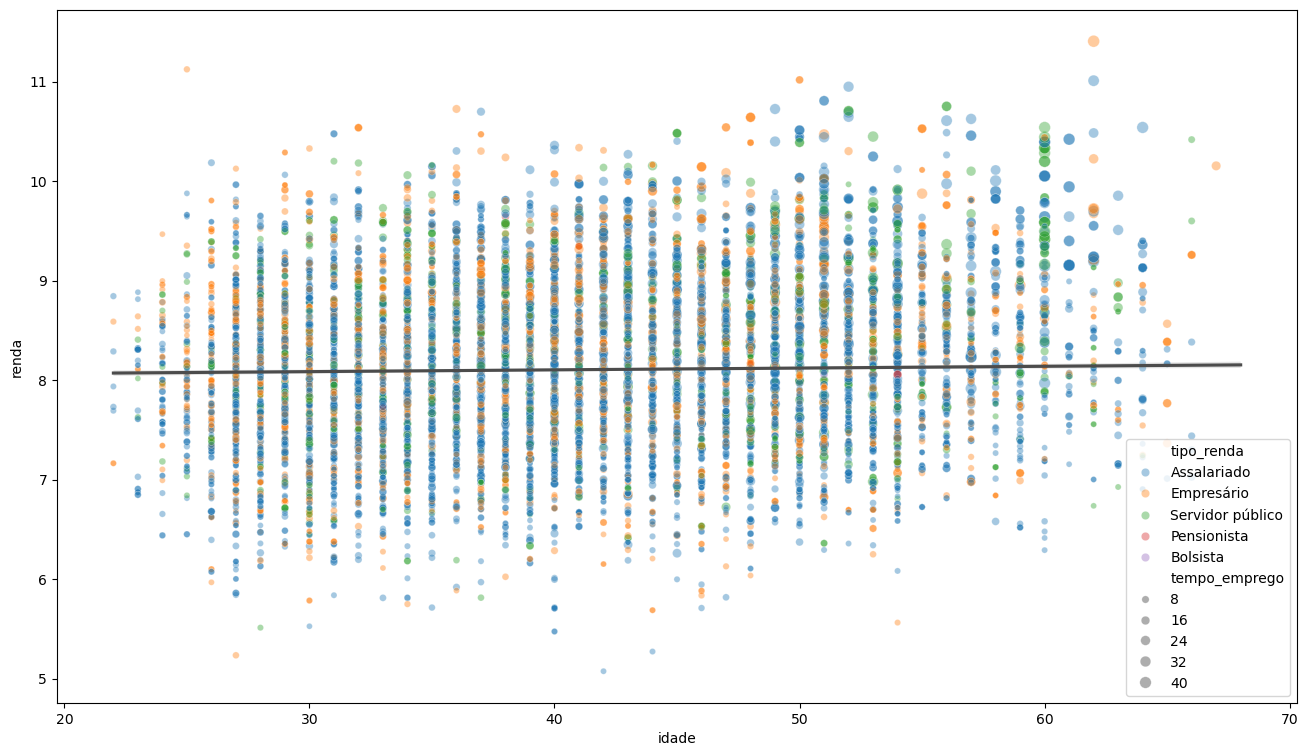

In [96]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [99]:
df_numeric_log = df_log.select_dtypes(include=['number'])
pd.concat(objs=[correlation_matrix.tail(1), 
                df_numeric_log.corr().tail(1)], 
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda', 
                                                1:'renda_log'})

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.009206,0.042837,0.394918,0.020118,1.0
renda_log,0.022322,0.025143,0.380039,0.034614,1.0


Analisando as informações após a aplicação do log, observa-se uma mudança baixa, em que há aumento de correlação em alguns dados, e diminuição em
outros, o que não gera um impacto de mudança significativo para a análise dos dados.